# Classification with an Academic Success



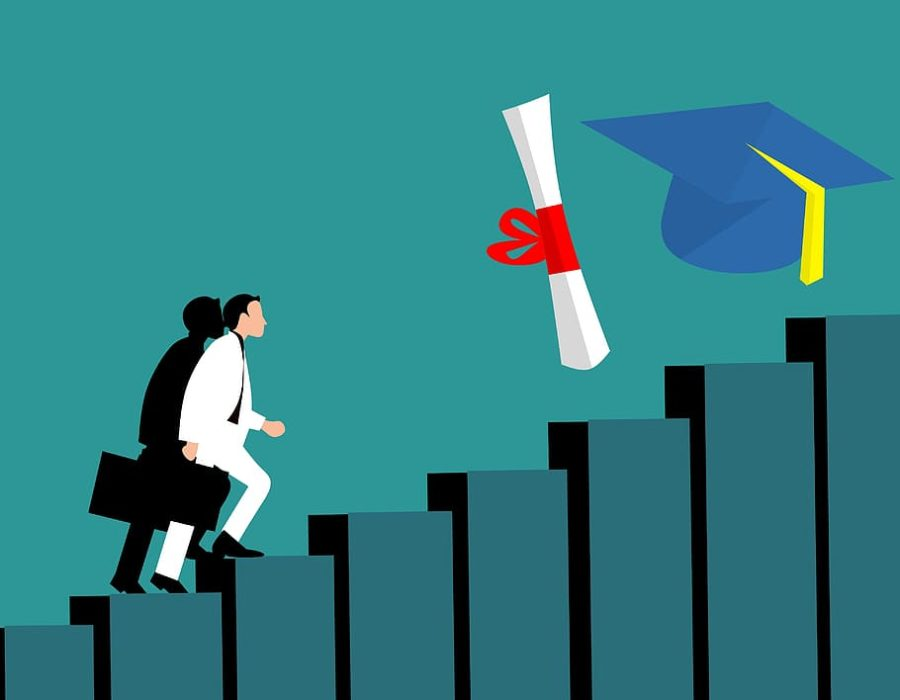
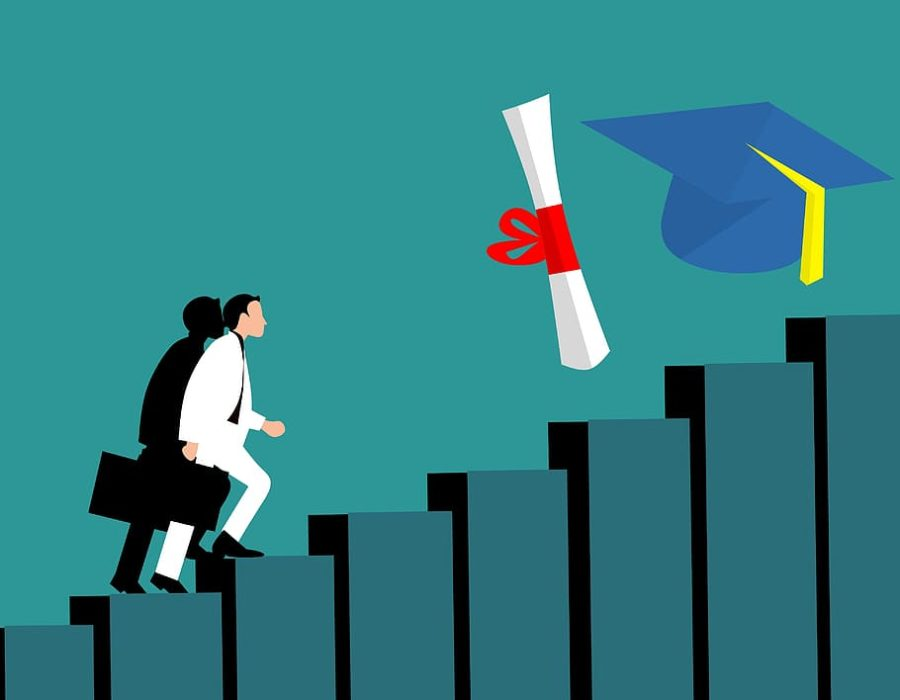

## **Introduction**  
Academic success is a crucial factor in a student's educational journey. Predicting student performance can help educators identify at-risk students early and take necessary actions to improve outcomes. In this project, we leverage machine learning techniques to analyze student data and predict their academic success based on various factors such as demographics, previous academic performance, and socioeconomic conditions.  

## **Aim of the Project**  
The primary goal of this project is to develop a predictive model that can classify students into different academic success categories (e.g., **Graduate, Dropout, Enrolled**). By understanding the key factors influencing student performance, we aim to:  

- Identify patterns that contribute to student success or failure.  
- Provide insights to educators and policymakers for early intervention.  
- Enhance academic planning and support mechanisms.  

## **Dataset Explanation**  
The dataset consists of student records, capturing both personal and academic attributes. The key features include:  

- **Demographic Information**: Age at enrollment, gender, nationality, and marital status.  
- **Academic Background**: Previous qualification, admission grade, and curricular unit performance.  
- **Socioeconomic Factors**: Parents' education levels, parents' occupations, unemployment rate, inflation rate, and GDP.  
- **Financial Status**: Scholarship status and tuition fee payment status.  
- **Enrollment Information**: Application mode, attendance type (daytime/evening), and whether the student has special educational needs.  
- **Target Variable**: The student's academic outcome, categorized as:  
  - **Graduate**: Successfully completed the program.  
  - **Dropout**: Left the program before completion.  
  - **Enrolled**: Still pursuing the program.  

By analyzing these variables, we aim to build a model that can predict a student’s academic trajectory with high accuracy.  

---

🔍 Let's dive into the data exploration and model building! 🚀  

## Requirements

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

## EDA (Exploratory Data Analysis)

In [10]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.shape

(76518, 38)

In [5]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [12]:
df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [13]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

id has 76518 values
Marital status has 6 values
Application mode has 22 values
Application order has 8 values
Course has 19 values
Daytime/evening attendance has 2 values
Previous qualification has 21 values
Previous qualification (grade) has 110 values
Nacionality has 18 values
Mother's qualification has 35 values
Father's qualification has 39 values
Mother's occupation has 40 values
Father's occupation has 56 values
Admission grade has 668 values
Displaced has 2 values
Educational special needs has 2 values
Debtor has 2 values
Tuition fees up to date has 2 values
Gender has 2 values
Scholarship holder has 2 values
Age at enrollment has 46 values
International has 2 values
Curricular units 1st sem (credited) has 21 values
Curricular units 1st sem (enrolled) has 24 values
Curricular units 1st sem (evaluations) has 36 values
Curricular units 1st sem (approved) has 23 values
Curricular units 1st sem (grade) has 1206 values
Curricular units 1st sem (without evaluations) has 12 values
Curr

## Data Visualization

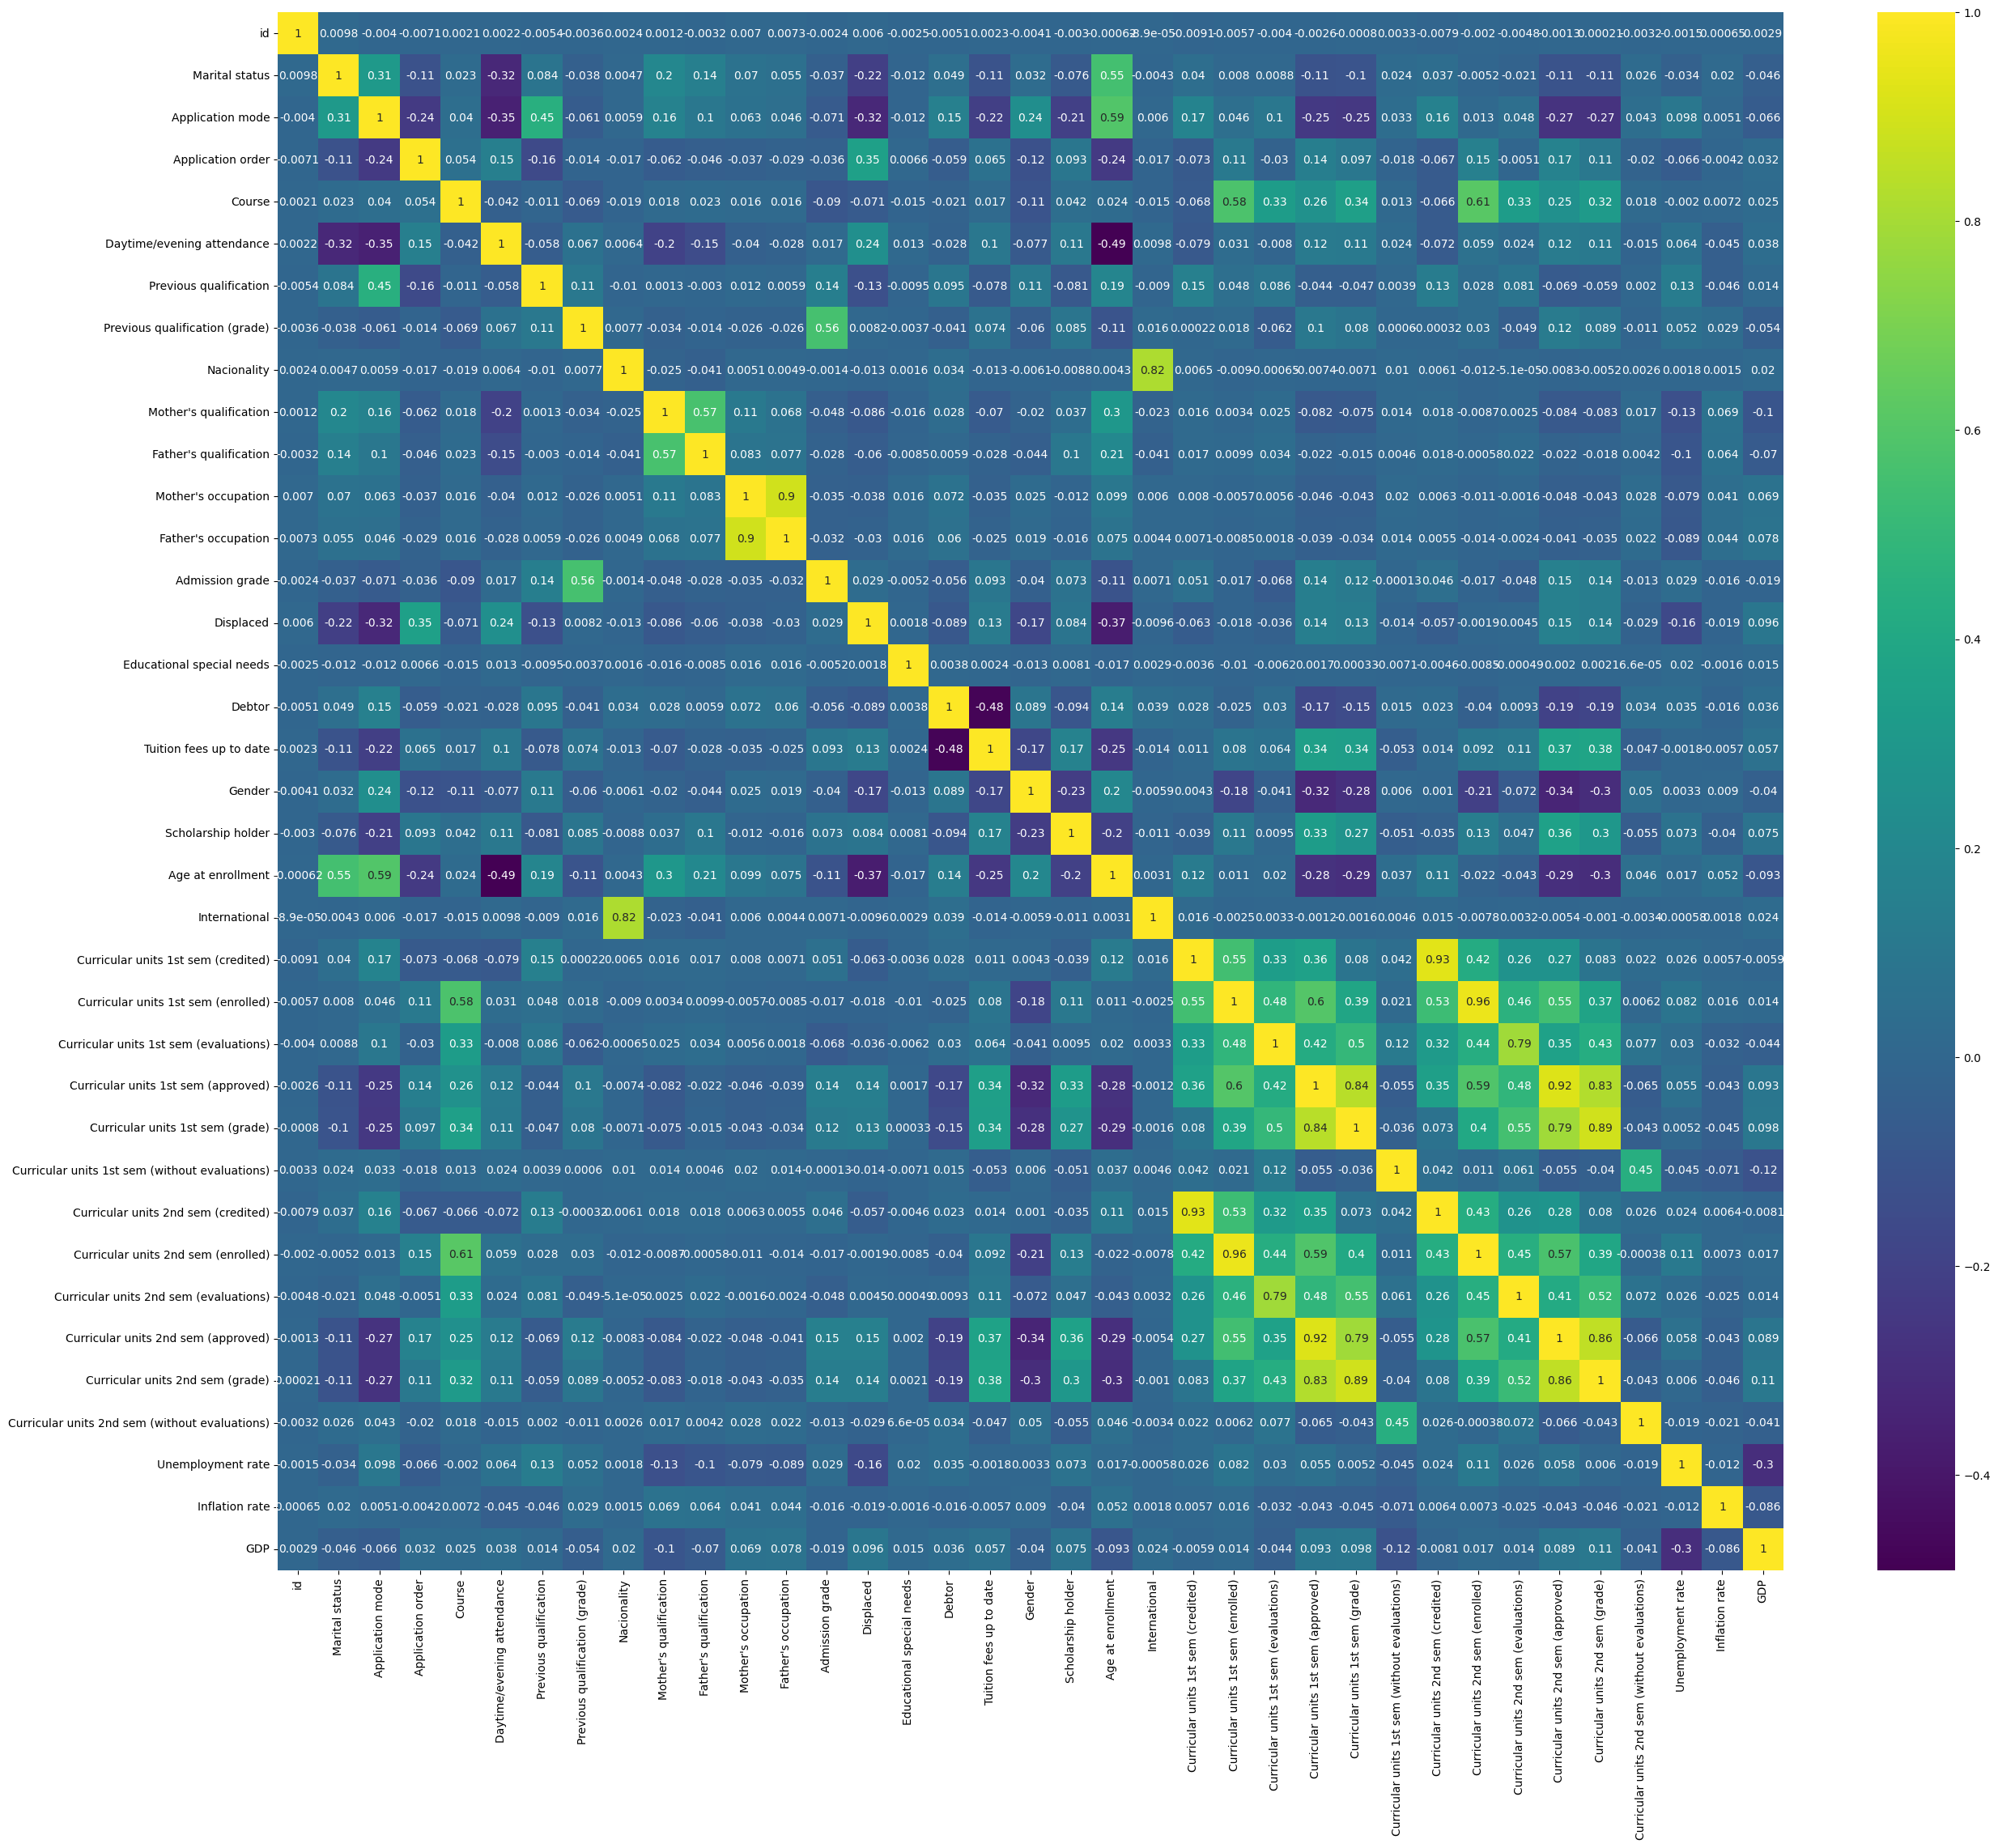

In [22]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

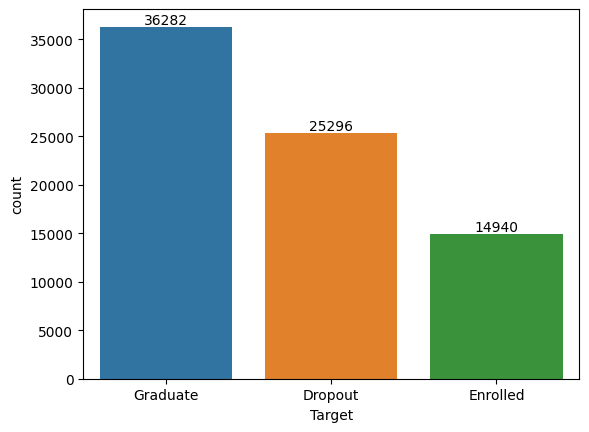

In [31]:
order = df['Target'].value_counts().index
ax = sns.countplot(x=df['Target'], order=order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

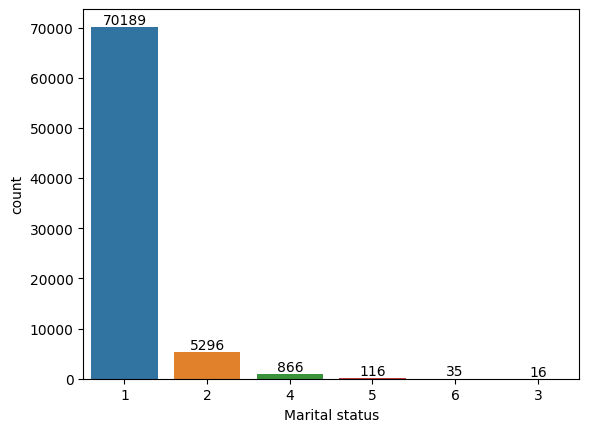

In [30]:
order = df['Marital status'].value_counts().index
ax = sns.countplot(x=df['Marital status'], order=order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

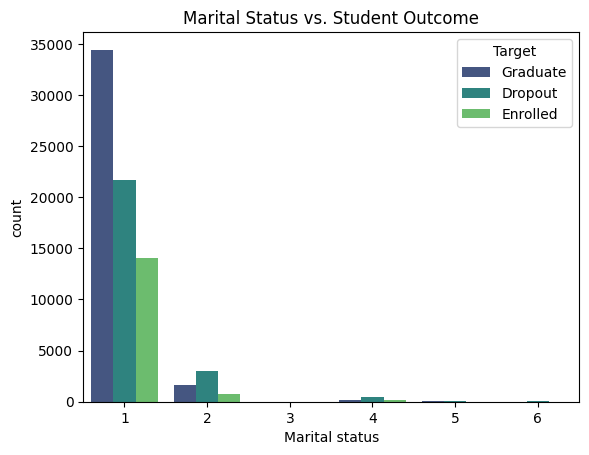

In [37]:
sns.countplot(x="Marital status", hue="Target", data=df, palette="viridis")
plt.title("Marital Status vs. Student Outcome");

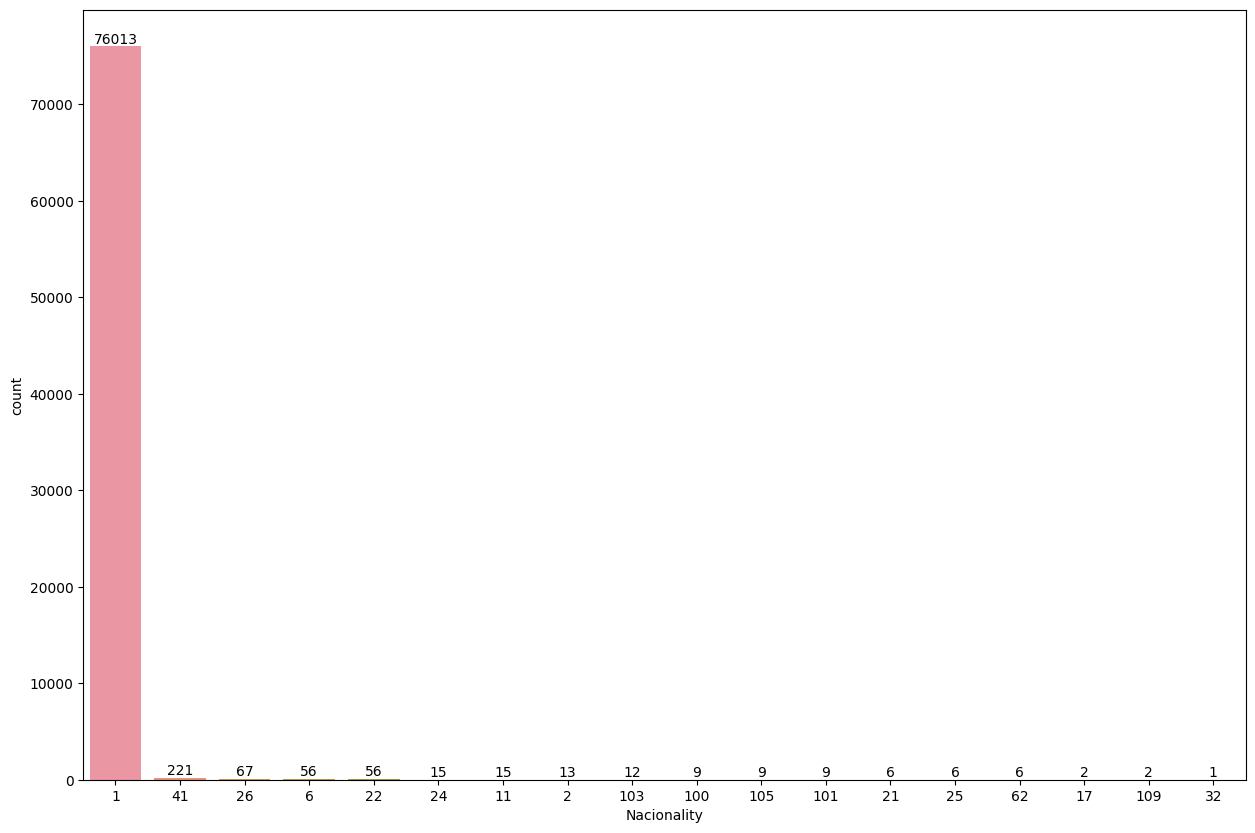

In [33]:
plt.figure(figsize=(15,10))
order = df['Nacionality'].value_counts().index
ax = sns.countplot(x=df['Nacionality'], order=order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

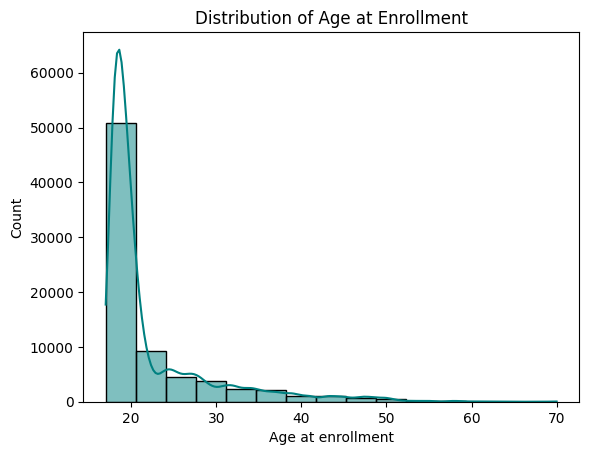

In [36]:
sns.histplot(df["Age at enrollment"], bins=15, kde=True, color="teal")
plt.title("Distribution of Age at Enrollment");

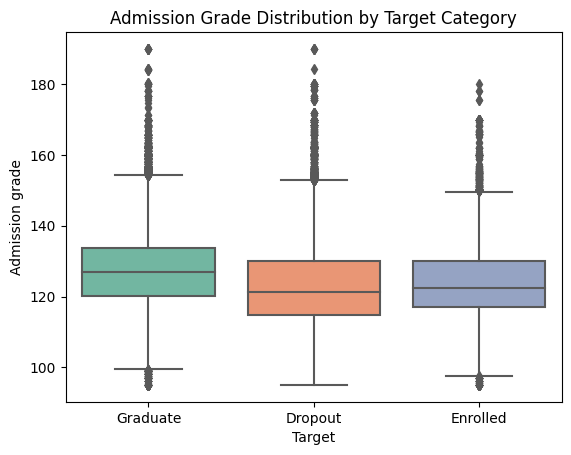

In [38]:
sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")
plt.title("Admission Grade Distribution by Target Category");

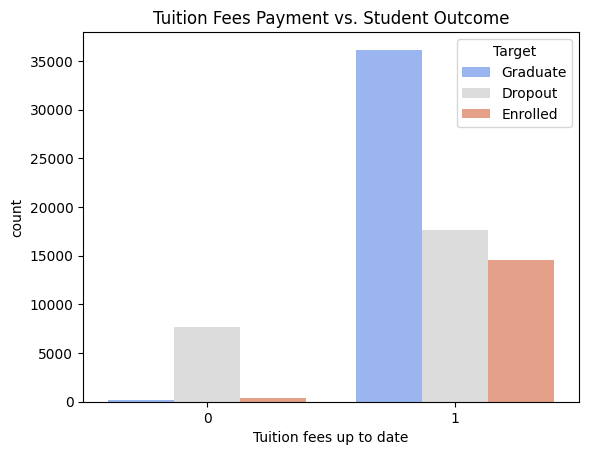

In [39]:
sns.countplot(x="Tuition fees up to date", hue="Target", data=df, palette="coolwarm")
plt.title("Tuition Fees Payment vs. Student Outcome");

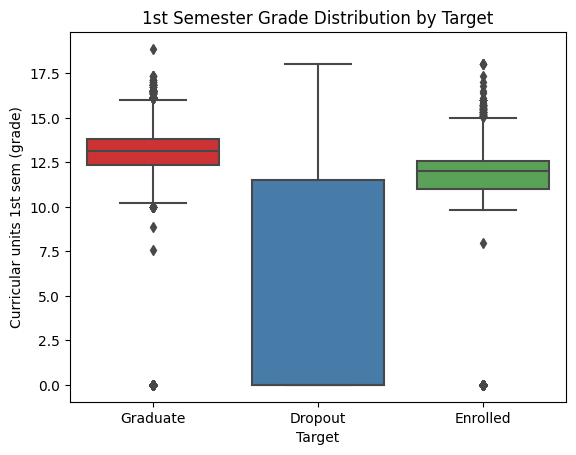

In [40]:
sns.boxplot(x="Target", y="Curricular units 1st sem (grade)", data=df, palette="Set1")
plt.title("1st Semester Grade Distribution by Target");

## Modelling with Conversational Models

In [134]:
x=df.drop(['Target','id'],axis=1)
y=df[['Target']]

In [115]:
from sklearn.preprocessing import normalize, scale 
x_new=scale(x) 
x=pd.DataFrame(x_new,columns=x.columns)

In [116]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["Target"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues",cbar=None)
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of Gradient Boosting Classifier


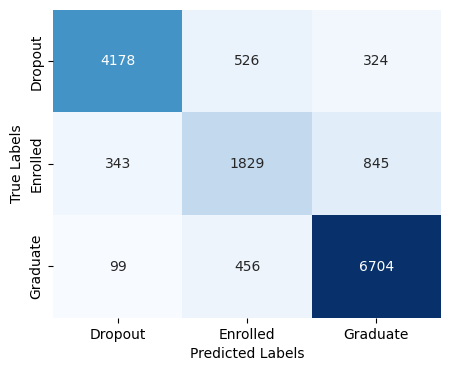

Confusion Matrix of Random Forest Classifier


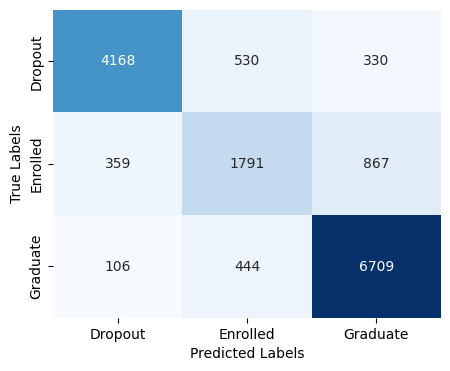

Confusion Matrix of Logistic Regression


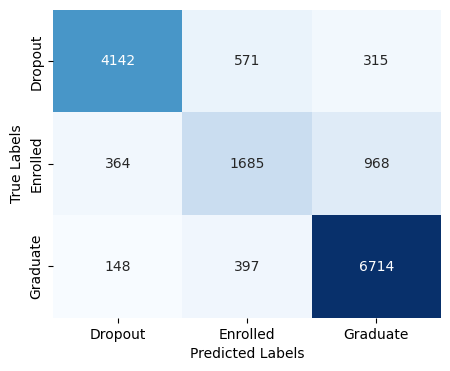

Confusion Matrix of Bernoulli NB


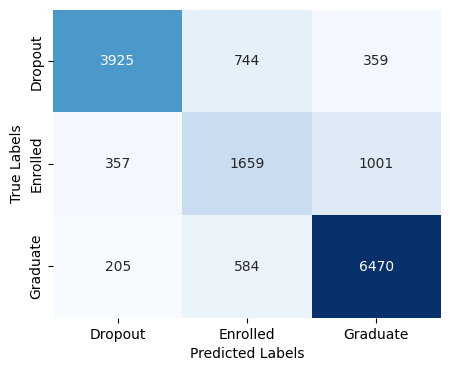

Confusion Matrix of KNeighbors Classifier


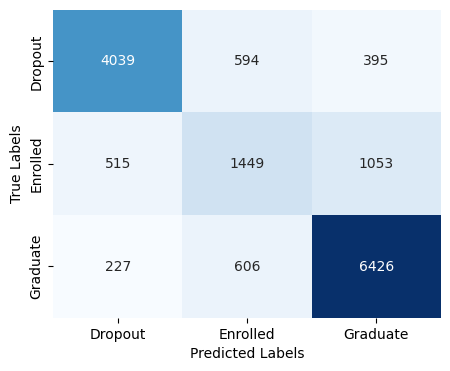

Confusion Matrix of Gaussian NB


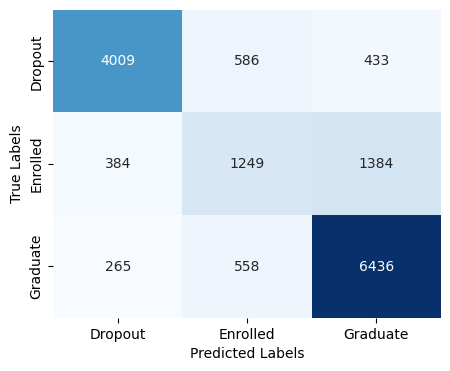

Confusion Matrix of Decision Tree Classifier


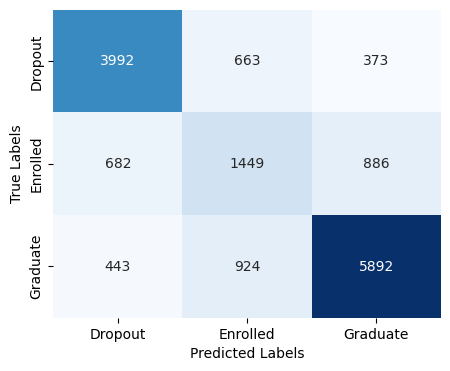

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.87      5028
    Enrolled       0.65      0.61      0.63      3017
    Graduate       0.85      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.86      5028
    Enrolled       0.65      0.59      0.62      3017
    Graduate       0.85      0.92      0.88      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

     Dropout       0.89      0.

,Accuracy Score
Gradient Boosting Classifier,0.830567
Random Forest Classifier,0.827757
Logistic Regression,0.819459
Bernoulli NB,0.787637
KNeighbors Classifier,0.778489
Gaussian NB,0.764114
Decision Tree Classifier,0.740525


In [117]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

## Testing the Best Conversational Model

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
GBC= GradientBoostingClassifier()
model = GBC.fit(x_train, y_train)

In [133]:
import joblib
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [125]:
df_test=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

In [126]:
submission1=pd.DataFrame({
    'id':df_test['id']
})

In [127]:
df_test.drop('id',axis=1,inplace=True)

In [128]:
df_test_new=scale(df_test) 
df_test=pd.DataFrame(df_test_new,columns=df_test.columns)

In [129]:
predictions=model.predict(df_test)

In [130]:
submission1['Target']=predictions

In [131]:
submission1.to_csv("submission.csv", index=False)

## Modelling with Deep Learning

In [106]:
x=df.drop(['Target','id'],axis=1)
y=df[['Target']]

In [82]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['Target'])

In [108]:
y['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [83]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [84]:
model2=Sequential()
model2.add(Dense(8, activation='relu'))
model2.add(Dense(32,activation='relu')) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(3,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
x_train.shape,y_train.shape

((61214, 36), (61214,))

In [91]:
history=model2.fit(x_train,y_train,epochs=100,validation_split=.20,verbose=0)

In [92]:
predictions=model2.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
accuracy_score(predictions_labels,y_test)

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.8101150026136957

## Testing the Deep Learning Model

In [93]:
df_test=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

In [94]:
submission2=pd.DataFrame({
    'id':df_test['id']
})

In [95]:
df_test.drop('id',axis=1,inplace=True)

In [109]:
predictions2=model2.predict(df_test)
class_labels = ['Graduate', 'Dropout', 'Enrolled']
predictions_labels = [class_labels[i] for i in np.argmax(predictions2, axis=1)]

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [110]:
submission2['Target']=predictions_labels

In [111]:
submission2.to_csv("submission.csv", index=False)

# 🏆 Conclusion  

### **Model Performance Summary**  
In this study, we developed multiple machine learning models to predict student academic outcomes (**Graduate, Dropout, Enrolled**). The results demonstrate that the **Gradient Boosting Classifier** achieved the highest accuracy of **83.06%**, outperforming other traditional models. Below is a summary of model performances:  

| Model                         | Accuracy Score |
|--------------------------------|---------------|
| **Gradient Boosting Classifier** | **0.8306** |
| Random Forest Classifier      | 0.8278 |
| Logistic Regression           | 0.8195 |
| Bernoulli NB                  | 0.7876 |
| KNeighbors Classifier         | 0.7785 |
| Gaussian NB                   | 0.7641 |
| Decision Tree Classifier      | 0.7405 |

Additionally, a **Deep Learning model** was implemented, achieving an accuracy of **81.01%**, which is slightly lower than the Gradient Boosting model.

### **Classification Report of the Best Model (Gradient Boosting Classifier)**  
- **Dropout Prediction**: High precision (**0.90**) and good recall (**0.83**), meaning the model effectively identifies students at risk of dropping out.  
- **Graduate Prediction**: High recall (**0.92**) and strong F1-score (**0.89**), indicating excellent performance in identifying students who graduate.  
- **Enrolled Prediction**: Slightly lower performance (**Precision: 0.65, Recall: 0.61**), suggesting some difficulty in distinguishing currently enrolled students.  

### **Key Insights & Future Improvements**  
✔️ **Economic & Academic Factors Matter**: Features like **admission grade, tuition fee payment status, and curricular unit performance** played a significant role in predicting student outcomes.  
✔️ **Machine Learning vs. Deep Learning**: While the **Gradient Boosting model** outperformed deep learning in this case, further optimization of neural network architecture may enhance results.  

#### **Final Thoughts**  
The findings from this study highlight the potential of **predictive analytics in education**. By leveraging machine learning, institutions can develop **early warning systems** to support at-risk students and improve overall academic success. 📊✨  

---